Setup

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings('ignore')

비지도 학습에는 차원 축소, 군집, 이상치 탐지, 밀도 추정이 있다.

차원 축소: Reduce_Dimensionality.ipynb 참고

군집: 비슷한 샘플을 클러스터로 모은다. 데이터 분석, 고객 분류, 추천 시스템, 검색 엔진, 이미지 분할, 준지도 학습, 차원 축소 등에 사용할 수 있다.

이상치 탐지: 정상 데이터가 어떻게 보이는지 학습한 후 비정상 샘플을 감지하는 데 사용한다.

밀도 추정: 데이터셋 생성 확률 과정의 확률 밀도 함수를 추정한다. 밀도 추정은 이상치 탐지에 널리 사용된다. 밀도가 매우 낮은 영역에 놓인 샘플이 이상치일 가능성이 높다. 데이터 분석과 시각화에도 유용하다.

군집

비슷한 것을 하나의 클러스터 또는 그룹으로 할당한다. 분류와 마찬가지로 각 샘플은 하나의 그룹에 할당되지만 분류와 달리 군집은 비지도 학습이므로 레이블이 없다. 다음은 붓꽃 데이터셋에서 레이블을 지운 상태를 보여준다.

In [2]:
from sklearn.datasets import load_iris

In [3]:
data = load_iris()
X = data.data
y = data.target
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

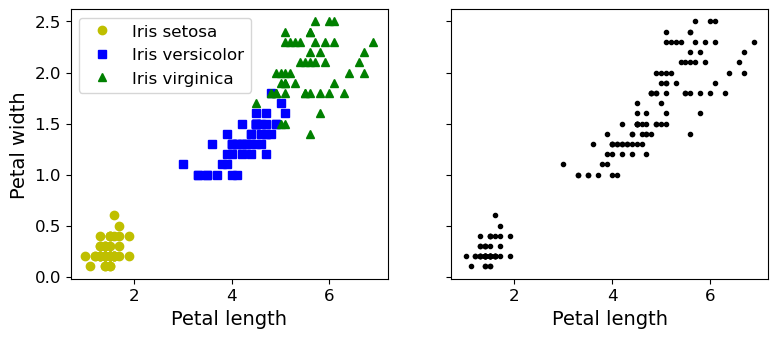

In [4]:
plt.figure(figsize=(9, 3.5))

plt.subplot(121)
plt.plot(X[y==0, 2], X[y==0, 3], "yo", label="Iris setosa")
plt.plot(X[y==1, 2], X[y==1, 3], "bs", label="Iris versicolor")
plt.plot(X[y==2, 2], X[y==2, 3], "g^", label="Iris virginica")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(fontsize=12)

plt.subplot(122)
plt.scatter(X[:, 2], X[:, 3], c="k", marker=".")
plt.xlabel("Petal length", fontsize=14)
plt.tick_params(labelleft=False)

plt.show()

간단하게 군집 해보자.

In [5]:
from sklearn.mixture import GaussianMixture

In [6]:
y_pred = GaussianMixture(n_components=3, random_state=42).fit(X).predict(X)

In [7]:
from scipy import stats

mapping = {}
for class_id in np.unique(y):
    mode = stats.mode(y_pred[y==class_id])
    mapping[mode[0]] = class_id

mapping

{1: 0, 2: 1, 0: 2}

In [8]:
y_pred = np.array([mapping[cluster_id] for cluster_id in y_pred])

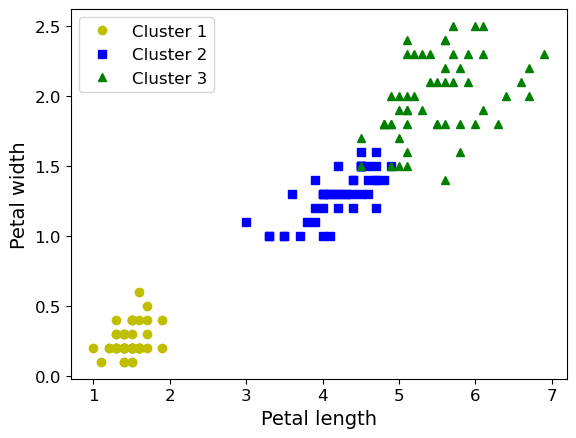

In [9]:
plt.plot(X[y_pred==0, 2], X[y_pred==0, 3], "yo", label="Cluster 1")
plt.plot(X[y_pred==1, 2], X[y_pred==1, 3], "bs", label="Cluster 2")
plt.plot(X[y_pred==2, 2], X[y_pred==2, 3], "g^", label="Cluster 3")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()

In [10]:
np.sum(y_pred==y)

145

In [11]:
np.sum(y_pred==y) / len(y_pred)

0.9666666666666667

군집은 다음에 적용될 수 있다.

고객 분류: 구매 이력이나 웹사이트 내 행동 등을 기반으로 고객을 클러스터로 모을 수 있다. 이를 통해 추천 시스템을 만들 수 있다.

데이터 분석: 새로운 데이터셋을 분석할 때 군집 알고리즘을 실행하고 각 클러스터를 따로 분석하면 도움이 된다.

차원 축소 기법: 군집 알고리즘은 각 클러스터에 대한 샘플의 친화성(클러스터에 얼마나 잘 맞는지)을 측정할 수 있게 해준다. 각 샘플의 특성 벡터 x는 클러스터 친화성 벡터로 바꿀 수 있다. k개의 클러스터가 있다면 이 벡터는 k차원이 되며, 이 값은 일반적으로 원본 특성 벡터보다 훨씬 저차원이다. 하지만 이후 분석을 위한 충분한 정보를 가질 수 있다.

이상치 탐지: 모든 클러스터에 친화성이 낮은 샘플은 이상치일 가능성이 높다. 재조 분야에서 결함을 감지할 때 유용하다.

준지도 학습: 레이블된 샘플이 적을 때 군집을 수행하고 동일한 클러스터에 있는 모든 샘플에 레이블을 전파하는 식으로 모든 샘플을 레이블링 하여 지도학습으로 이어질 수 있다.

검색 엔진: 데이터베이스의 모든 이미지에 군집 알고리즘을 적용하면 이후 사용자가 찾으려는 이미지의 클러스터에 속하는 이미지를 반환하여 이미지 검색 엔진을 만들 수 있다.

이미지 분할: 색을 기반으로 픽셀을 클러스터로 모은 후 각 픽셀의 색을 해당 클러스터의 평균 색으로 바꾼다. 이미지에 있는 색상 종류를 크게 줄이며, 물체의 윤곽을 감지하기 쉬워져 물체 탐지 및 추적 시스템에서 많이 활용한다.

군집 알고리즘으로는 k-평균, DBSCAN이 있다.

k-평균

일단 다음 데이터셋을 k-평균 알고리즘으로 훈련해보자. 이는 각 클러스터의 중심(센트로이드)을 찾고 가장 가까운 클러스터에 샘플을 할당한다.

In [12]:
from sklearn.datasets import make_blobs

In [13]:
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

In [14]:
X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

In [15]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

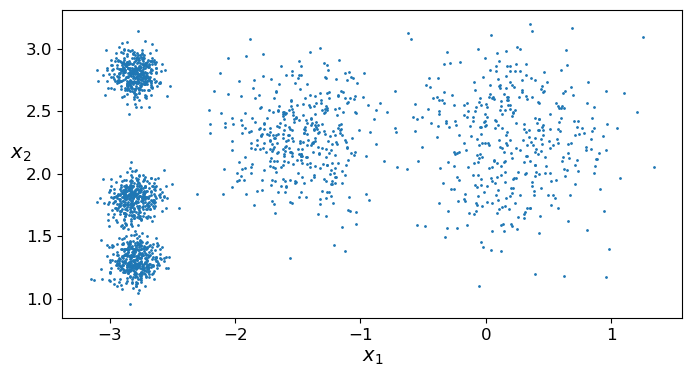

In [16]:
plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.show()

In [17]:
from sklearn.cluster import KMeans
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)

In [18]:
y_pred

array([0, 0, 4, ..., 3, 1, 0])

In [19]:
y_pred is kmeans.labels_

True

In [20]:
kmeans.cluster_centers_

array([[-2.80214068,  1.55162671],
       [ 0.08703534,  2.58438091],
       [-1.46869323,  2.28214236],
       [-2.79290307,  2.79641063],
       [ 0.31332823,  1.96822352]])

In [21]:
kmeans.labels_

array([0, 0, 4, ..., 3, 1, 0])

새로운 샘플로 어디에 할당되는지 보자.

In [22]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([4, 4, 3, 3])

클러스터의 결정 경계를 그려보자. 여기서 얻어지는 것은 보로노이 다이어그램이다.

In [23]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

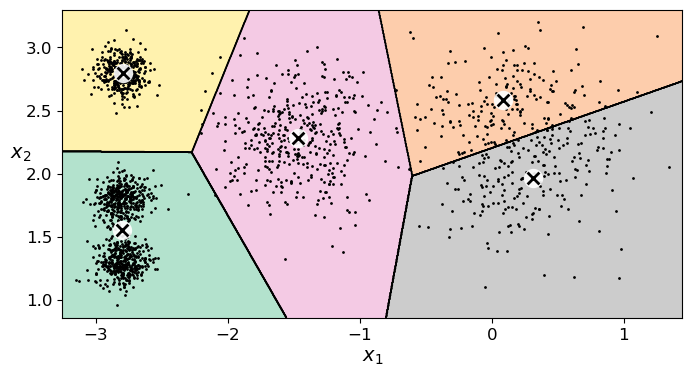

In [24]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.show()

k-평균 알고리즘은 클러스터의 크기가 많이 다르면 잘 작동하지 않는다. 샘플을 클러스터에 할당할 때 센트로이드까지 거리를 고려하는 것이 전부이기 때문이다.

위처럼 샘플을 하나의 클러스터에 할당하는 것을 하드 군집이라 한다. 반면 샘플에 클러스터마다의 점수를 부여하는 것을 소프트 군집이라 하고, 이는 하드 군집보다 유용할 수 있다. 점수로는 샘플과 센트로이드 사이의 거리나 가우시안 방사 기저 함수와 같은 유사도 점수가 될 수 있다. KMeans 클래스의 transform() 메서드로 샘플과 각 센트로이드 사이의 거리를 확인하자.

In [25]:
kmeans.transform(X_new)

array([[2.83778629, 0.59082671, 1.4955481 , 2.9042344 , 0.31493543],
       [5.81943941, 2.9710039 , 4.47759126, 5.84739223, 2.68685968],
       [1.4618254 , 3.11488787, 1.6912185 , 0.29040966, 3.47026031],
       [0.96879317, 3.08818836, 1.54672634, 0.36159148, 3.35573094]])

In [26]:
np.linalg.norm(np.tile(X_new, (1, k)).reshape(-1, k, 2) - kmeans.cluster_centers_, axis=2)

array([[2.83778629, 0.59082671, 1.4955481 , 2.9042344 , 0.31493543],
       [5.81943941, 2.9710039 , 4.47759126, 5.84739223, 2.68685968],
       [1.4618254 , 3.11488787, 1.6912185 , 0.29040966, 3.47026031],
       [0.96879317, 3.08818836, 1.54672634, 0.36159148, 3.35573094]])

센트로이드가 주어진다면 데이터셋에 있는 모든 샘플에 가장 가까운 센트로이드 클러스터를 할당할 수 있다. 반대로 모든 샘플의 레이블이 주어졌다면 각 클러스터에 속한 샘플의 평균을 계산하여 모든 센트로이드를 구할 수 있다. 만약 센트로이드와 레이블 모두 주어지지 않는다면 어떻게 해야할까? 우선 무작위로 센트로이드를 선정한다. 그다음 샘플에 레이블을 할당하여 센트로이드를 업데이트하기를 반복한다. 센트로이드 변화가 없을 때(수렴할 때) 종료한다.

In [27]:
kmeans_iter1 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=1, random_state=0)
kmeans_iter2 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=2, random_state=0)
kmeans_iter3 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=3, random_state=0)
kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

KMeans(algorithm='full', init='random', max_iter=3, n_clusters=5, n_init=1,
       random_state=0)

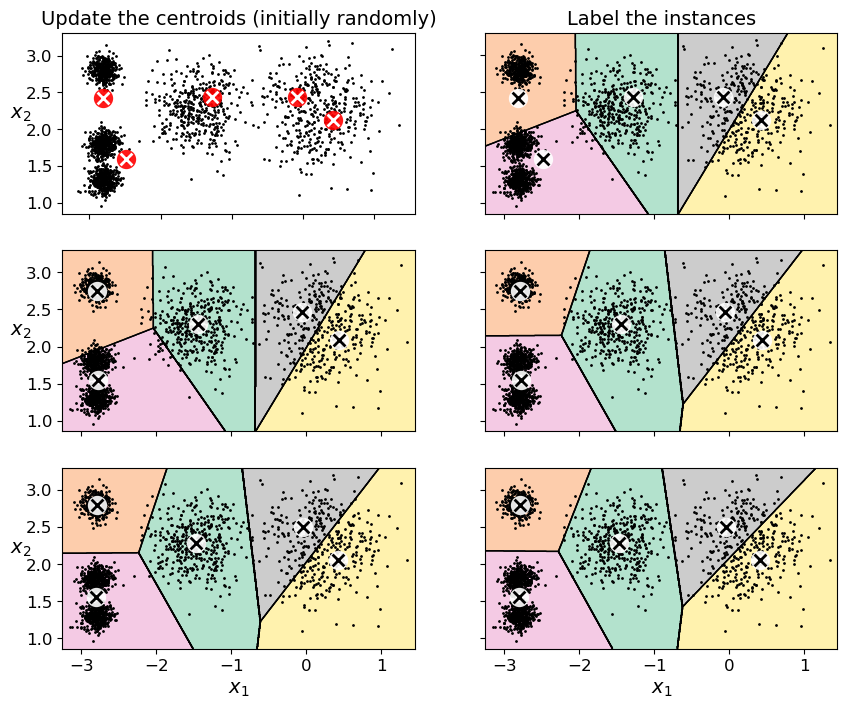

In [28]:
plt.figure(figsize=(10, 8))

plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids (initially randomly)", fontsize=14)

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False, show_ylabels=False)
plt.title("Label the instances", fontsize=14)

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False, show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False, show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X, show_ylabels=False)

plt.show()

이 알고리즘은 수렴이 보장되지만, 그 수렴 위치가 항상 같지는 않다. 다음은 센트로이드 초기화후 다시 학습(random_state를 바꾸고)시킨 결과이다.

In [29]:
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)

    plt.figure(figsize=(10, 3.2))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1, fontsize=14)

    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2, fontsize=14)

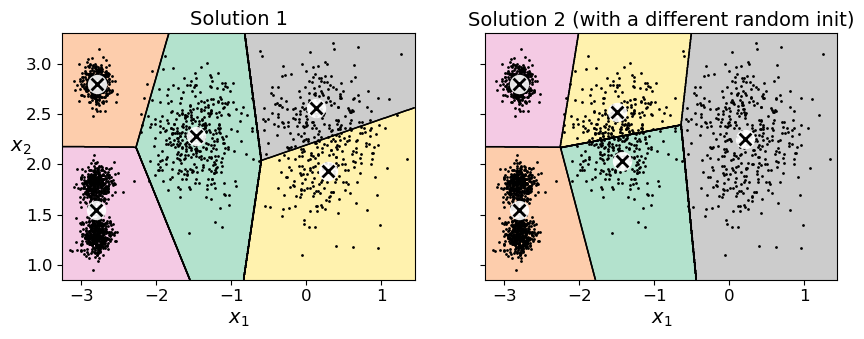

In [30]:
kmeans_rnd_init1 = KMeans(n_clusters=5, init="random", n_init=1,
                         algorithm="full", random_state=2)
kmeans_rnd_init2 = KMeans(n_clusters=5, init="random", n_init=1,
                         algorithm="full", random_state=5)

plot_clusterer_comparison(kmeans_rnd_init1, kmeans_rnd_init2, X,
                          "Solution 1", "Solution 2 (with a different random init)")

plt.show()

센트로이드 위치를 근사하게 알 수 있다면 init 매개변수에 센트로이드 리스트를 담은 넘파이 배열을 지정하고 n_init을 1로 설정할 수 있다.

In [31]:
KMeans()

KMeans()

In [32]:
good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])
kmeans = KMeans(n_clusters=5, init=good_init, n_init=1, random_state=42)

랜덤 초기화를 다르게 하여 여러 번 알고리즘을 실행하고 가장 좋은 솔루션을 선택할 수 있다. 랜덤 초기화 횟수는 n_init 매개변수로 조절한다. 기본값은 10이다. 사이킷런은 이 중 최선의 솔루션을 반환한다. 그 평가 방법은 각 샘플과 가장 가까운 센트로이드 사이의 제곱 거리 합이며 모델의 이니셔라 부른다. 아래는 위의 학습된 모델의 이니셔이다. 낮을수록 좋다. 사이킷런의 '큰 값이 좋은 것'라는 규칙을 따르기 위해 kmeans.score(X)로 이니셔의 음수값을 반환하는 방법도 있다.

In [33]:
kmeans.fit(X)
kmeans.inertia_

211.5985372581684

init = "random"이면 원래 방식을 사용하고, 지정하지 않으면 k-평균 알고리즘을 향상시킨 더 똑똑한 알고리즘을 사용한다. 또한 algorithm 매개변수를 "full"로 지정하면 이전 거리 계산 방식을 쓰고 지정하지 않으면 불필요한 거리 계산을 피하여 속도를 높이는 방법을 기본적으로 사용한다.

전체 데이터셋을 사용해 반복하지 않고 반복마다 미니배치를 사용해 센트로이드를 조금씩 이동하는 방법으로 속도를 개선할 수 있다. 이는 MiniBatchKMeans로 구현되어 있다.

In [34]:
from sklearn.cluster import MiniBatchKMeans

In [35]:
minibatch_kmeans = MiniBatchKMeans(n_clusters=5, random_state=42)
minibatch_kmeans.fit(X)

MiniBatchKMeans(n_clusters=5, random_state=42)

In [36]:
minibatch_kmeans.inertia_

211.65899374574312

메모리에 학습 데이터셋이 들어가지 않을 때는 위 방법에서 partial_fit() 메서드를 사용할 수 있고, memmap 클래스를 사용할 수도 있다. 다만 만들어진 결과에서 가장 좋은 것을 직접 골라야 해서 할 일이 많다.

다음은 미니배치 k-평균과 일반 k-평균의 이너셔와 훈련 시간을 비교한 그래프이다.

In [37]:
from timeit import timeit

In [38]:
times = np.empty((100, 2))
inertias = np.empty((100, 2))
for k in range(1, 101):
    kmeans_ = KMeans(n_clusters=k, random_state=42)
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k, random_state=42)
    print("\r{}/{}".format(k, 100), end="")
    times[k-1, 0] = timeit("kmeans_.fit(X)", number=10, globals=globals())
    times[k-1, 1]  = timeit("minibatch_kmeans.fit(X)", number=10, globals=globals())
    inertias[k-1, 0] = kmeans_.inertia_
    inertias[k-1, 1] = minibatch_kmeans.inertia_

100/100

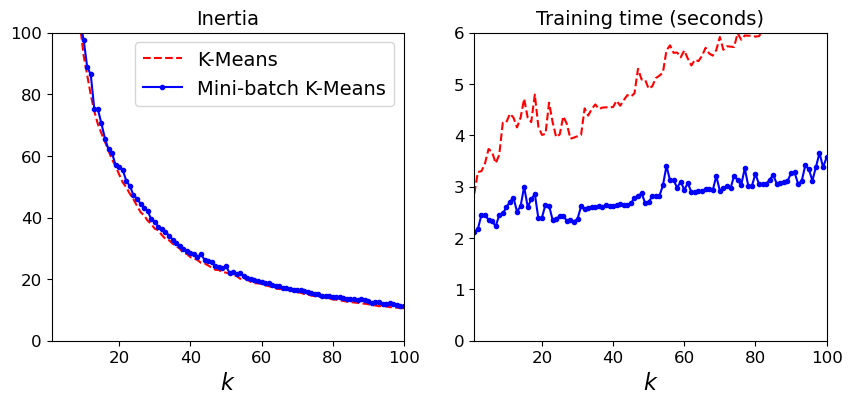

In [39]:
plt.figure(figsize=(10,4))

plt.subplot(121)
plt.plot(range(1, 101), inertias[:, 0], "r--", label="K-Means")
plt.plot(range(1, 101), inertias[:, 1], "b.-", label="Mini-batch K-Means")
plt.xlabel("$k$", fontsize=16)
plt.title("Inertia", fontsize=14)
plt.legend(fontsize=14)
plt.axis([1, 100, 0, 100])

plt.subplot(122)
plt.plot(range(1, 101), times[:, 0], "r--", label="K-Means")
plt.plot(range(1, 101), times[:, 1], "b.-", label="Mini-batch K-Means")
plt.xlabel("$k$", fontsize=16)
plt.title("Training time (seconds)", fontsize=14)
plt.axis([1, 100, 0, 6])

plt.show()

올바른 클러스터 개수를 지정하는 것은 중요하다.

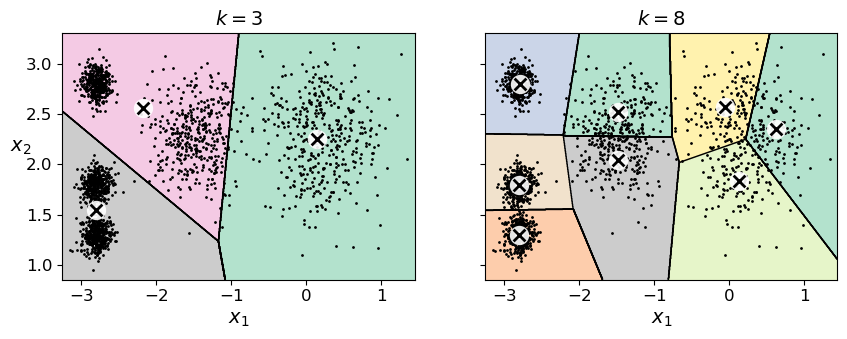

In [40]:
kmeans_k3 = KMeans(n_clusters=3, random_state=42)
kmeans_k8 = KMeans(n_clusters=8, random_state=42)

plot_clusterer_comparison(kmeans_k3, kmeans_k8, X, "$k=3$", "$k=8$")
plt.show()

클러스터 개수를 정할 때 이너셔는 별 도움 안된다. 센트로이드가 늘어날수록 이너셔는 줄어들기 때문이다. 다음은 클러스터수 k에 대한 이너셔 그래프이다.

In [41]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

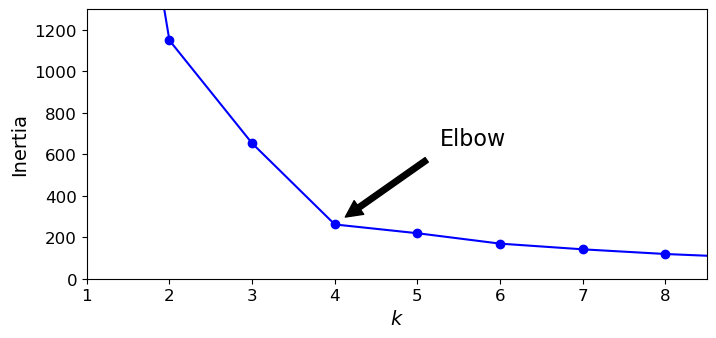

In [42]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(4, inertias[3]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis([1, 8.5, 0, 1300])
plt.show()

보통 elbow는 k에 대한 정답을 모른다면 좋은 선택이다. 최선의 클러스터 개수를 선택하는 더 정확한 방법은 실루엣 점수이다. 이 값은 모든 샘플에 대한 실루엣 계수의 평균이다. 실루엣 계수는 -1 ~ +1이며 +1에 가까울수록 자신의 클러스터 안에 잘 속해 있고 다른 클러스터와는 멀리 떨어져 있다는 뜻이다. 0에 가까우면 클러스터 경계에 위치한다는 의미이다. -0에 가까울수록 잘못된 클러스터에 할당되었다는 의미이다. 실루엣 점수는 silhouette_score()로 계산할 수 있다.

In [43]:
from sklearn.metrics import silhouette_score

In [44]:
silhouette_score(X, kmeans.labels_)

0.655517642572828

클러스터 개수별 실루엣 점수를 보자.

In [45]:
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

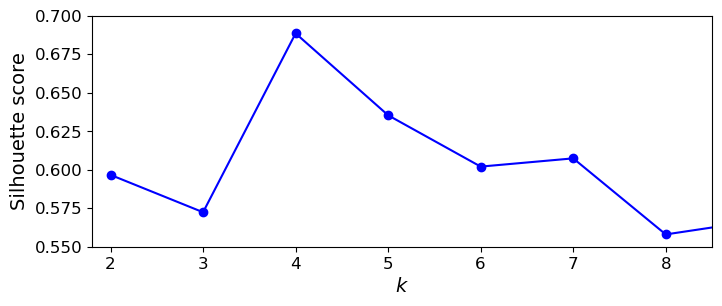

In [46]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.8, 8.5, 0.55, 0.7])
plt.show()

실루엣 계수를 정렬하면 더 많은 정보를 알 수 있다. 이를 실루엣 다이어그램이라 한다.

In [47]:
kmeans_rnd_10_inits = KMeans(n_clusters=5, init="random", n_init=10,
                              algorithm="full", random_state=2)
kmeans_rnd_10_inits.fit(X)

KMeans(algorithm='full', init='random', n_clusters=5, n_init=10, random_state=2)

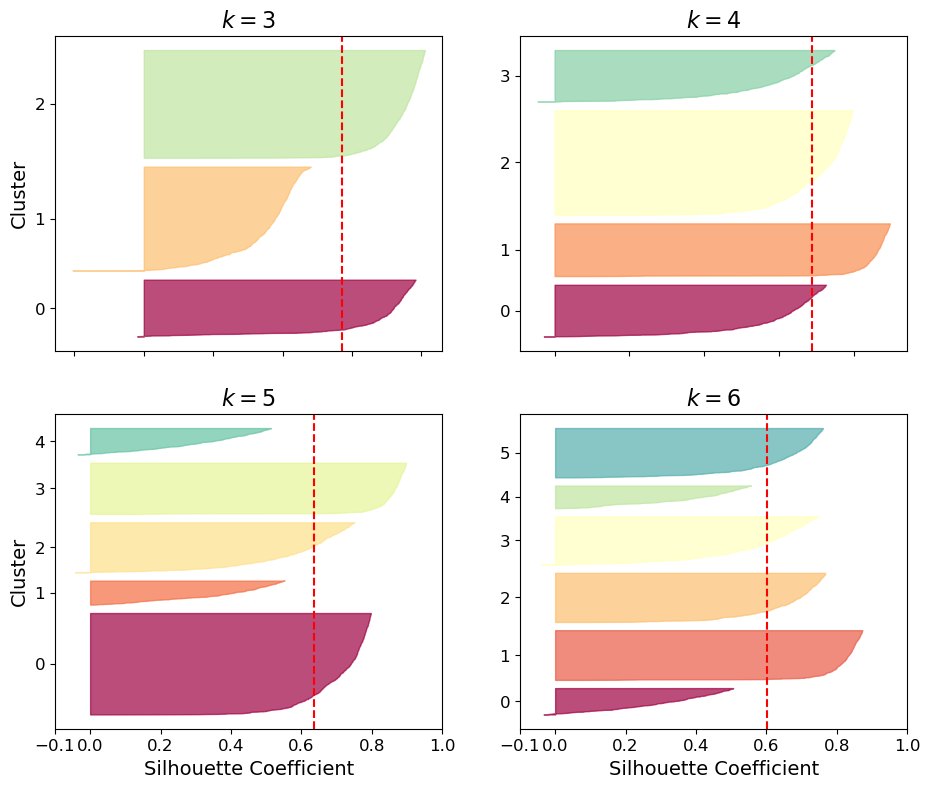

In [48]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()

높이는 클러스터가 포함하는 샘플 수, 너비는 실루엣 계수, 빨간 점선은 실루엣 점수를 나타낸다. 랜덤 스테이트 차이인지 k=5에서 결과가 안좋게 나왔지만, 책에서는 달랐다. k=5일 때 칼모양이 균등하고 모두 빨간 점선을 넘었다. 비록 이너셔가 k=4에서 더 높지만 칼하나가 너무 크므로(샘플이 불균형하므로) 샘플을 균형있게 나누는 k=5를 선택하는 것이 좋다.

k=평균은 속도가 빠르고 확장이 용이하지만 차선을 피하기 위해 여러 번 실행해야 하고 클러스터 개수를 지정해야 한다. 또한 데이터 분포가 원형이 아닐 경우 잘 작동하지 않는다.

In [49]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

In [50]:
kmeans_good = KMeans(n_clusters=3, init=np.array([[-1.5, 2.5], [0.5, 0], [4, 0]]), n_init=1, random_state=42)
kmeans_bad = KMeans(n_clusters=3, random_state=42)
kmeans_good.fit(X)
kmeans_bad.fit(X)

KMeans(n_clusters=3, random_state=42)

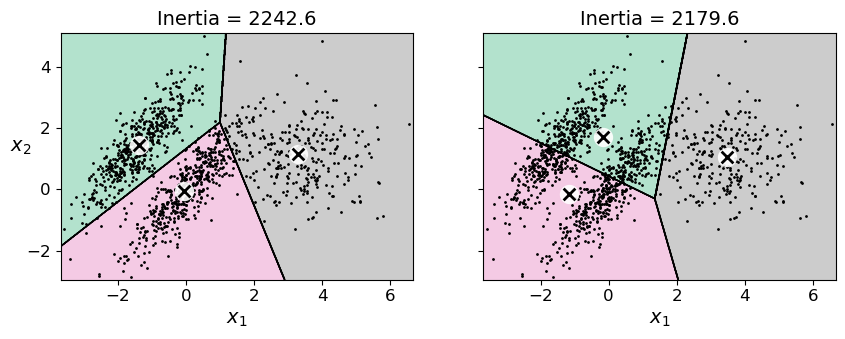

In [51]:
plt.figure(figsize=(10, 3.2))

plt.subplot(121)
plot_decision_boundaries(kmeans_good, X)
plt.title("Inertia = {:.1f}".format(kmeans_good.inertia_), fontsize=14)

plt.subplot(122)
plot_decision_boundaries(kmeans_bad, X, show_ylabels=False)
plt.title("Inertia = {:.1f}".format(kmeans_bad.inertia_), fontsize=14)

plt.show()

위와같은 타원형 클러스터에서는 가우시안 혼합 모델이 잘 작동한다.

군집에서 도움을 받을 수 있는 방법 몇 가지를 알아보자. 

이미지 분할: 이미지를 세그먼트 여러 개로 분할하는 작업이다. 시맨틱 분할에서는 동일한 종류의 물체에 속한 모든 픽셀은 같은 세그먼트에 할당된다. 여기서 최고 수준 성능을 내려면 합성곱 신경망을 사용한 복잡한 모델을 사용해야 한다. 지금은 그보다 훨씬 쉬운 색상 분할 작업을 수행해보자. 동일한 색상을 가진 픽셀을 같은 세그먼트에 할당할 것이다.

In [52]:
# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "unsupervised_learning"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [53]:
# Download the ladybug image
import urllib.request
images_path = os.path.join(PROJECT_ROOT_DIR, "images", "unsupervised_learning")
os.makedirs(images_path, exist_ok=True)
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
filename = "ladybug.png"
print("Downloading", filename)
url = DOWNLOAD_ROOT + "images/unsupervised_learning/" + filename
urllib.request.urlretrieve(url, os.path.join(images_path, filename))

('.\\images\\unsupervised_learning\\ladybug.png',
 <http.client.HTTPMessage at 0x2ae0f8388e0>)

In [54]:
from matplotlib.image import imread
image = imread(os.path.join(images_path, filename))
image.shape

(533, 800, 3)

이미지가 3D 배열로 표현된다. 첫 차원이 사진 높이, 두 번째 차원이 사진 너비, 세 번째 차원이 컬러채널 개수이다.

In [55]:
X = image.reshape(-1, 3)
kmeans = KMeans(n_clusters=8, random_state=42).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

In [56]:
segmented_imgs = []
n_colors = (10, 8, 6, 4, 2)
for n_clusters in n_colors:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape))

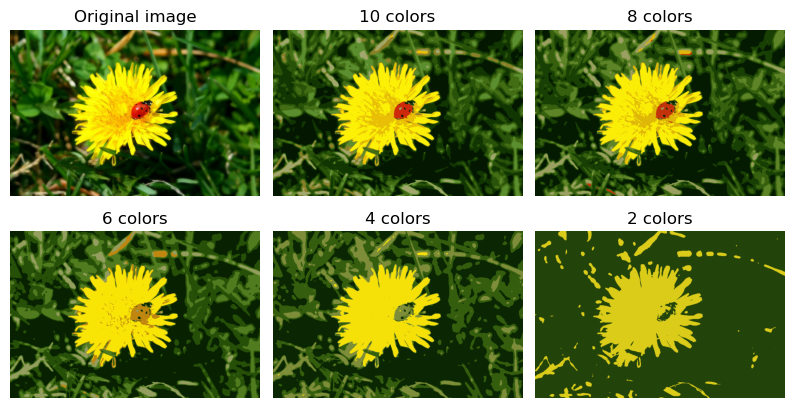

In [57]:
plt.figure(figsize=(10,5))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.subplot(231)
plt.imshow(image)
plt.title("Original image")
plt.axis('off')

for idx, n_clusters in enumerate(n_colors):
    plt.subplot(232 + idx)
    plt.imshow(segmented_imgs[idx])
    plt.title("{} colors".format(n_clusters))
    plt.axis('off')

plt.show()

전처리: 군집은 지도 학습 알고리즘용 데이터의 전처리에 사용할 수 있다. MNIST 데이터셋의 차원 축소에 군집을 사용해보자. 다음은 원본 MNIST를 회귀 모델로 학습한 정확도이다.

In [58]:
from sklearn.datasets import load_digits

In [59]:
X_digits, y_digits = load_digits(return_X_y=True)

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, random_state=42)

In [62]:
from sklearn.linear_model import LogisticRegression

In [63]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=5000, multi_class='ovr', random_state=42)

In [64]:
log_reg_score = log_reg.score(X_test, y_test)
log_reg_score

0.9688888888888889

다음은 차원 축소 후 회귀 모델로 학습한 정확도이다. 훈련 세트를 50개의 클러스터로 모은 후 이미지를 50개 클러스터까지 거리로 바꾼 후 회귀 모델을 적용시킨다(차원을 50으로 감소시킨다.).

In [65]:
from sklearn.pipeline import Pipeline

In [66]:
pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters=50, random_state=42)),
    ("log_reg", LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)),
])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('kmeans', KMeans(n_clusters=50, random_state=42)),
                ('log_reg',
                 LogisticRegression(max_iter=5000, multi_class='ovr',
                                    random_state=42))])

In [67]:
pipeline_score = pipeline.score(X_test, y_test)
pipeline_score

0.9733333333333334

GridSearchCV로 좋은 클러스터 개수 k를 찾아보자.

In [68]:
from sklearn.model_selection import GridSearchCV

In [69]:
# param_grid = dict(kmeans__n_clusters=range(2, 100))
# grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose=2)
# grid_clf.fit(X_train, y_train)

In [70]:
# grid_clf.best_params_

In [71]:
# grid_clf.score(X_test, y_test)

준지도 학습: 레이블된 데이터가 소수일 때 클러스터로 훈련 세트를 모으로 센트로이드에 가장 가까운 이미지(대표 이미지)로 학습한다. 다음 코드는 50개의 클러스터를 사용한다(대표 샘플은 적으므로 레이블을 할당할 수 있다).

In [72]:
n_labeled = 50

In [73]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", random_state=42)
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])
log_reg.score(X_test, y_test)

0.8333333333333334

In [74]:
k = 50

In [75]:
kmeans = KMeans(n_clusters=k, random_state=42)
X_digits_dist = kmeans.fit_transform(X_train)
representative_digit_idx = np.argmin(X_digits_dist, axis=0)
X_representative_digits = X_train[representative_digit_idx]

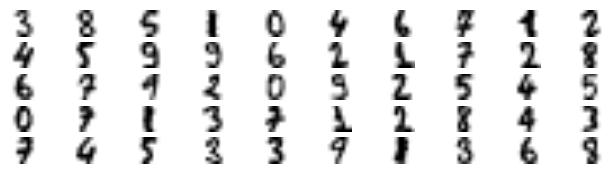

In [76]:
plt.figure(figsize=(8, 2))
for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(X_representative_digit.reshape(8, 8), cmap="binary", interpolation="bilinear")
    plt.axis('off')

plt.show()

사진을 보고 손수 레이블링하자.

In [77]:
y_train[representative_digit_idx]

array([3, 8, 5, 1, 0, 4, 6, 7, 1, 2, 4, 5, 9, 9, 6, 2, 1, 7, 2, 8, 6, 7,
       9, 2, 0, 9, 2, 5, 4, 5, 0, 7, 1, 3, 7, 1, 2, 8, 4, 3, 7, 4, 5, 3,
       3, 9, 1, 3, 6, 8])

In [78]:
y_representative_digits = np.array([
    3, 8, 5, 1, 0, 4, 6, 7, 1, 2, 4, 5, 9, 9, 6, 2, 1, 7, 2, 8, 6, 7,
       9, 2, 0, 9, 2, 5, 4, 5, 0, 7, 1, 3, 7, 1, 2, 8, 4, 3, 7, 4, 5, 3,
       3, 9, 1, 3, 6, 8])

In [79]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.score(X_test, y_test)

0.9022222222222223

더 나아가서, 동일한 클러스터에 있는 모든 샘플로 레이블을 전파하자. 레이블 전파라 부른다.

In [80]:
y_train_propagated = np.empty(len(X_train), dtype=np.int32)
for i in range(k):
    y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]

In [81]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train, y_train_propagated)

LogisticRegression(max_iter=5000, multi_class='ovr', random_state=42)

In [82]:
log_reg.score(X_test, y_test)

0.9222222222222223

위에선 클러스터에 속한 모든 데이터에 레이블을 전파했는데, 이 방식은 분명 센트로이드에서 먼 잘못 군집된 샘플에 잘못된 레이블을 부여한다. 이번엔 센트로이드에서 가까운 20%에만 레이블을 전파해보자.

In [83]:
percentile_closest = 20

X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]
for i in range(k):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1

In [84]:
partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

In [85]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)

LogisticRegression(max_iter=5000, multi_class='ovr', random_state=42)

In [86]:
log_reg.score(X_test, y_test)

0.9266666666666666

전파된 레이블이 실제 데이터와 얼마나 같은지 확인하자.

In [87]:
np.mean(y_train_partially_propagated == y_train[partially_propagated])

0.9826989619377162

\+ 능동학습: 전문가가 학습 알고리즘과 상호작용하여 알고리즘이 요청할 때 특정 샘플의 레이블을 제공한다. 가장 널리 쓰이는 것은 불확실성 샘플링이다.

\+ 불확실성 샘플링: 데이터중 일부만 레이블되었을 때 레이블된 데이터만을 이용해 학습하고 레이블되지 않은 모든 샘플의 예측을 만든다. 불확실성이 큰 샘플을 전문가에게 보내 레이블을 붙인다. 학습한다. 반복한다.

DBSCAN

이 일고리즘은 연속적 지역을 클러스터로 정의한다. 모든 클러스터가 충분히 밀집되어 있고 밀집되지 않은 지역과 잘 구분될 때 좋은 성능을 낸다.

In [88]:
from sklearn.datasets import make_moons

In [89]:
X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)

In [90]:
from sklearn.cluster import DBSCAN

In [91]:
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.05)

In [92]:
dbscan.labels_[:10]

array([ 0,  2, -1, -1,  1,  0,  0,  0,  2,  5], dtype=int64)

모든 샘플의 레이블은 labels_에 저장되어 있다. 클러스터 인덱스가 -1인 일부 샘플은 알고리즘이 이 샘플을 이상치로 판단했다는 의미이다.

핵심 샘플의 인덱스는 인스턴스 변수 core_sample_indices_에서 확인 가능하다. 핵심 샘플 자체는 components_에 저장되어 있다.

In [93]:
len(dbscan.core_sample_indices_)

808

In [94]:
dbscan.core_sample_indices_[:10]

array([ 0,  4,  5,  6,  7,  8, 10, 11, 12, 13], dtype=int64)

In [95]:
dbscan.components_[:3]

array([[-0.02137124,  0.40618608],
       [-0.84192557,  0.53058695],
       [ 0.58930337, -0.32137599]])

In [96]:
np.unique(dbscan.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6], dtype=int64)

In [97]:
dbscan2 = DBSCAN(eps=0.2)
dbscan2.fit(X)

DBSCAN(eps=0.2)

In [98]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

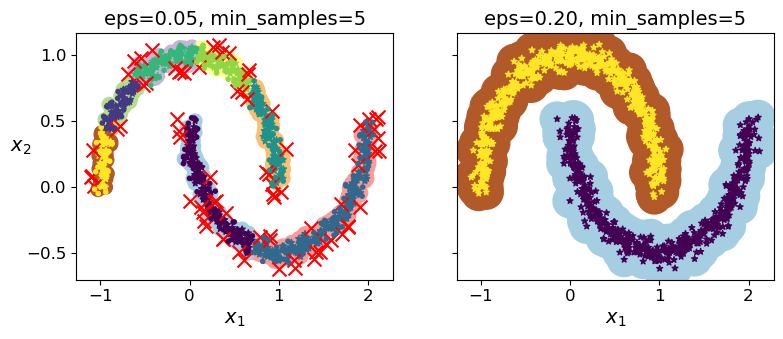

In [99]:
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_dbscan(dbscan, X, size=100)

plt.subplot(122)
plot_dbscan(dbscan2, X, size=600, show_ylabels=False)

plt.show()

좌측은 클러스터 7개를 만들고 많은 샘플을 이상치로 판단했다. 다행히 eps를 0.2로 증가시켜 샘플의 이웃 범위를 넓히면 우측과 같은 완벽한 군집을 얻을 수 있다.

DBSCAN 클래스는 새로운 샘플에 대한 클러스터를 예측할 수 없다. 따라서 사용자가 필요한 예측기를 선택해야 한다. KNeighborsClassifier를 훈련시켜보자.

In [100]:
dbscan = dbscan2

In [101]:
from sklearn.neighbors import KNeighborsClassifier

In [102]:
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(n_neighbors=50)

새로운 샘플 몇 개를 전달해 예측해보자

In [103]:
X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])
knn.predict(X_new)

array([1, 0, 1, 0], dtype=int64)

In [104]:
knn.predict_proba(X_new)

array([[0.18, 0.82],
       [1.  , 0.  ],
       [0.12, 0.88],
       [1.  , 0.  ]])

결정경계는 다음과 같다.

Saving figure cluster_classification_plot


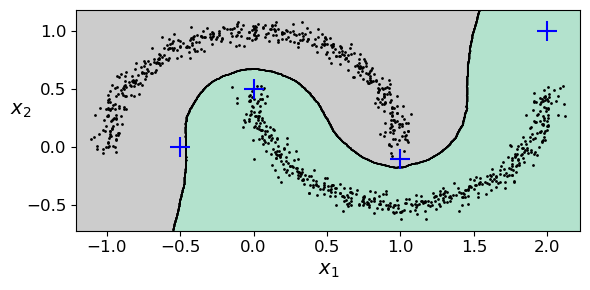

In [105]:
plt.figure(figsize=(6, 3))
plot_decision_boundaries(knn, X, show_centroids=False)
plt.scatter(X_new[:, 0], X_new[:, 1], c="b", marker="+", s=200, zorder=10)
save_fig("cluster_classification_plot")
plt.show()

이 분류기는 핵심 샘플에서만 훈련되었지만 모든 샘플에서 훈련할 수도 있다. 이상치를 제외할 수도 있다.

훈련 세트에 이상치가 없기 때문에 클러스터가 멀리 떨어져 있어도 분류기는 항상 클러스터 한 개를 선택한다. 최대 거리를 사용하면 두 클러스터에서 멀리 떨어진 샘플을 이상치로 간단히 분류할 수 있다. kneighbors() 사용하자. 이 메서드는 샘플을 전달하면 훈련 세트에서 가장 가까운 k개의 이웃의 거리와 인덱스를 반환한다.

In [106]:
y_dist, y_pred_idx = knn.kneighbors(X_new, n_neighbors=1)
y_pred = dbscan.labels_[dbscan.core_sample_indices_][y_pred_idx]
y_pred[y_dist > 0.2] = -1
y_pred.ravel()

array([-1,  0,  1, -1], dtype=int64)

DBSCAN은 간단하지만 매우 강력하다. 클러스터 모양과 개수에 상관없이 감지할 수 있다. 이상치에 안정적이고 하이퍼파라미터가 두 개(eps, min_samples) 뿐이다. 하지만 클러스터간 밀집도가 크게 다르면 모든 클러스터를 올바르게 잡아내는 것이 불가능하다.

다른 군집 알고리즘은 다음과 같은 것들이 있다.

병합 군집: 클러스터를 밑바닥부터 쌓는다. 가장 인접한 클러스터 쌍을 연결하며 최종적으로 클러스터 이진 트리를 만든다. 이 트리의 리프는 개별 샘플이다. 대규모 샘플과 클러스터에 잘 확장되며 다양한 형태의 클러스터를 감지할 수 있다.

BIRCH: 대규모 데이터셋을 위해 고안되었다. 특성이 많지 않다면(20개 이하) k-평균보다 빠르고 비슷한 결과를 만든다. 새로운 샘플을 클러스터에 빠르게 할당할 수 있는 정보를 담은 트리 구조를 만든다.

평균-이동: 각 샘플을 중심으로 하는 원을 그린다. 원마다 안에 포함된 샘플의 평균을 구하고 원의 중심을 평균점으로 이동시킨다. 모든 원이 움직이지 않을 때까지 반복한다. 이는 지역의 최대 일도를 찾는 과정으로, 동일한 지역에 안착한 원에 있는 모든 샘플은 동일한 클러스터가 된다.

유사도 전파: 샘플이 자신을 대표할 수 있는 비슷한 샘플에 두표하여 각 대표와 투표한 샘플이 클러스터를 형성한다.

스펙트럼 군집: 샘플 사이의 유사도 행렬을 받아 저차원 임베딩을 만든다. 그다음 이 저차원 공간에서 또 다른 군집 알고리즘을 사용한다. 샘플 개수가 많으면 잘 적용되지 않고 클러스트의 크기가 매우 다르면 잘 작동하지 않는다.

가우시안 혼합

가우시안 혼합 모델(GMM)은 샘플 파라미터가 알려지지 않은 여러 개의 혼합된 가우시안 분포에서 생성되었다고 가정하는 확률 모델이다. 하나의 가우시안 분포에서 생선된 샘플들은 하나의 클러스터를 형성한다.

여러 GMM 변종이 있는데 가장 간한단 버전은 GaussianMixture에 구현되어 있다. 여기선 사전에 가우시안 분포의 개수 k를 알아야 한다.

In [107]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

In [108]:
from sklearn.mixture import GaussianMixture

In [109]:
# n_init의 기본값은 1이다. EM이 나쁜 솔루션으로 수렴할 수 있으므로 여러 번 실행하기 위해 10으로 설정했다.
gm = GaussianMixture(n_components=3, n_init=10, random_state=42)
gm.fit(X)

GaussianMixture(n_components=3, n_init=10, random_state=42)

In [110]:
gm.weights_

array([0.40005972, 0.20961444, 0.39032584])

In [111]:
gm.means_

array([[-1.40764129,  1.42712848],
       [ 3.39947665,  1.05931088],
       [ 0.05145113,  0.07534576]])

In [112]:
gm.covariances_

array([[[ 0.63478217,  0.72970097],
        [ 0.72970097,  1.16094925]],

       [[ 1.14740131, -0.03271106],
        [-0.03271106,  0.95498333]],

       [[ 0.68825143,  0.79617956],
        [ 0.79617956,  1.21242183]]])

잘 작동했다. 이 데이터를 생성하기 위해 사용한 가중치는 0.2, 0.4, 0.4이다. 이 클래스는 기댓값-최대화(EM) 알고리즘을 사용한다. 클러스터 파라미터를 랜덤하게 초기화하고 수렴할 때까지 두 단계를 반복한다. 먼저 샘플을 클러스터에 할당한다(기댓값 단계). 그다음 클러스터를 업데이트한다(최대화 단계). k-평균과 비슷하지만 k-평균과 달리 EM은 소프트 클러스터 할당을 사용한다. 기댓값 단계에서 알고리즘은 각 클러스터에 속할 확률을 예측하고, 최대화 단계에서 각 클러스터가 데이터셋에 있는 모든 샘플을 사용해 업데이트된다. 클러스터에 속할 추정 확률로 샘플에 가중치가 적용되고, 이 확룰을 샘플에 대한 클러스터의 책임이라 부른다. 최대화 단계에서 클러스터 업데이트는 책임이 가장 많은 샘플에 크게 영향을 받는다.

In [113]:
# 알고리즘이 수렵했는지 여부
gm.converged_

True

In [114]:
#반복 수
gm.n_iter_

4

In [115]:
# 클래스터 할당(하드 군집)
gm.predict(X)

array([2, 2, 0, ..., 1, 1, 1], dtype=int64)

In [116]:
# 클래스터 확률 예측(소프트 군집)
gm.predict_proba(X)

array([[6.76282339e-07, 2.31833274e-02, 9.76815996e-01],
       [6.74575575e-04, 1.64110061e-02, 9.82914418e-01],
       [9.99922764e-01, 1.99781831e-06, 7.52377580e-05],
       ...,
       [2.12540639e-26, 9.99999568e-01, 4.31902443e-07],
       [1.45002917e-41, 1.00000000e+00, 5.20915318e-16],
       [7.93266114e-41, 1.00000000e+00, 2.30971331e-15]])

가우시안 혼합 모델은 생성 모델이다. 이 모델에서 새로운 샘플을 만들 수 있다. 출력은 클러스터 인덱스 순으로 정렬되어 있다.

In [117]:
X_new, y_new = gm.sample(6)
X_new

array([[-2.32491052,  1.04752548],
       [-1.16654983,  1.62795173],
       [ 1.84860618,  2.07374016],
       [ 3.98304484,  1.49869936],
       [ 3.8163406 ,  0.53038367],
       [ 0.38079484, -0.56239369]])

In [118]:
y_new

array([0, 0, 1, 1, 1, 2])

주어진 위치에서 모델의 밀도를 추정할 수 있다. 이 메서드는 주어진 샘플의 위치의 확률 밀도 함수의 로그를 예측한다. 점수가 높을수록 밀도가 높다.

In [119]:
gm.score_samples(X)

array([-2.60786904, -3.57094519, -3.3302143 , ..., -3.51359636,
       -4.39793229, -3.80725953])

In [120]:
resolution = 100
grid = np.arange(-10, 10, 1 / resolution)
xx, yy = np.meshgrid(grid, grid)
X_full = np.vstack([xx.ravel(), yy.ravel()]).T

pdf = np.exp(gm.score_samples(X_full))
pdf_probas = pdf * (1 / resolution) ** 2
pdf_probas.sum()

0.9999999999225083

In [121]:
from matplotlib.colors import LogNorm

def plot_gaussian_mixture(clusterer, X, resolution=1000, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z,
                linewidths=2, colors='r', linestyles='dashed')
    
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    plot_centroids(clusterer.means_, clusterer.weights_)

    plt.xlabel("$x_1$", fontsize=14)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

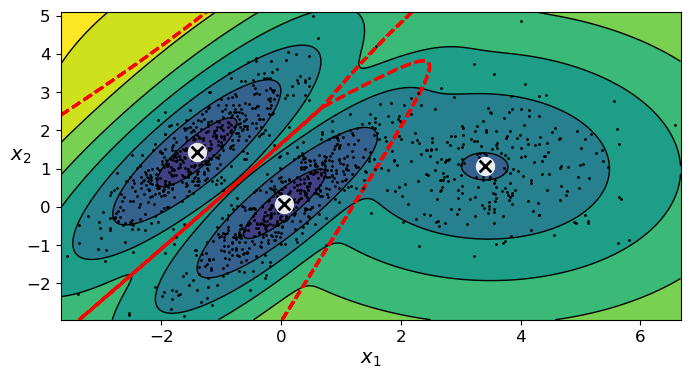

In [123]:
plt.figure(figsize=(8, 4))

plot_gaussian_mixture(gm, X)

plt.show()

특성이나 클러스터가 많거나 샘플이 적을 때 EM이 최적의 솔루션으로 수렴하기 어렵다. 이런 작업의 어려움을 줄이려면 알고리즘이 학습할 파라미터 개수를 제한해야 한다. 그 방법 중 하나는 클러스터의 모양과 방향의 범위를 제한하는 것이다. covariance_type 매개변수에 다음 값을 넣을 수 있다.

"spherical": 모든 클러스터가 원형(단 지름은 다를 수 있음)

"diag": 클러스터는 어떤 타원형도 가능하지만 타원의 축은 좌표 축과 나란해야 함

"tied": 모든 클러스터가 동일한 타원 모양, 크기, 방향을 갖는다.

기본값은 "full"(제약 없음)이다.

In [124]:
gm_full = GaussianMixture(n_components=3, n_init=10, covariance_type="full", random_state=42)
gm_tied = GaussianMixture(n_components=3, n_init=10, covariance_type="tied", random_state=42)
gm_spherical = GaussianMixture(n_components=3, n_init=10, covariance_type="spherical", random_state=42)
gm_diag = GaussianMixture(n_components=3, n_init=10, covariance_type="diag", random_state=42)
gm_full.fit(X)
gm_tied.fit(X)
gm_spherical.fit(X)
gm_diag.fit(X)

GaussianMixture(covariance_type='diag', n_components=3, n_init=10,
                random_state=42)

In [125]:
def compare_gaussian_mixtures(gm1, gm2, X):
    plt.figure(figsize=(9, 4))

    plt.subplot(121)
    plot_gaussian_mixture(gm1, X)
    plt.title('covariance_type="{}"'.format(gm1.covariance_type), fontsize=14)

    plt.subplot(122)
    plot_gaussian_mixture(gm2, X, show_ylabels=False)
    plt.title('covariance_type="{}"'.format(gm2.covariance_type), fontsize=14)

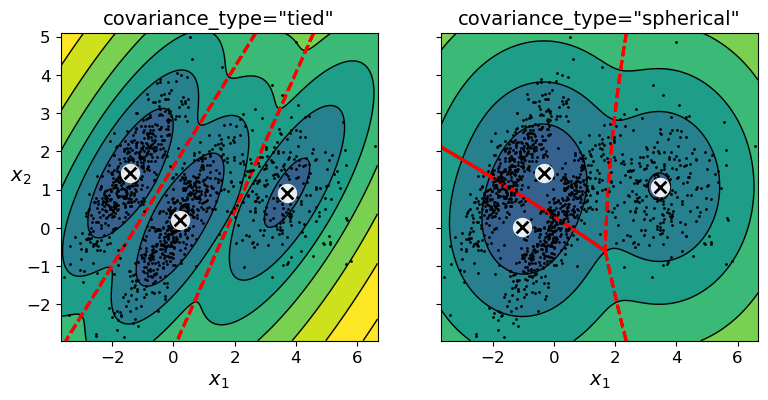

In [126]:
compare_gaussian_mixtures(gm_tied, gm_spherical, X)

plt.show()

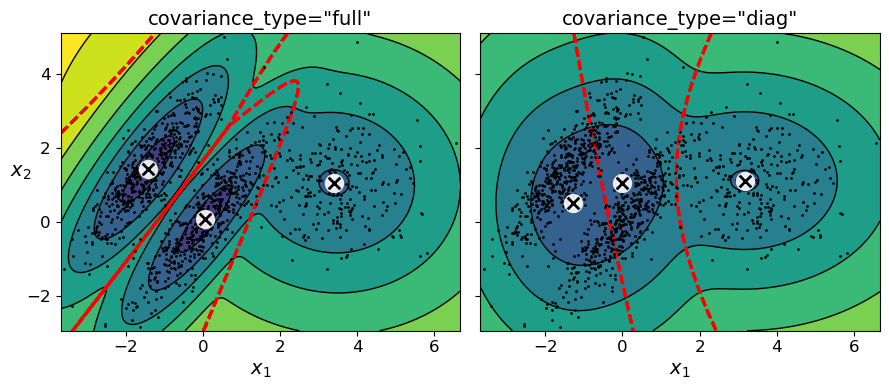

In [127]:
compare_gaussian_mixtures(gm_full, gm_diag, X)
plt.tight_layout()
plt.show()

가우시안 혼합으로 이상치 탐지

보통과 많이 다른 샘플을 이상치, 보통 샘플을 정상치라 한다. 방법은 매우 간단하다. 밀도가 낮은 지역에 있는 모든 샘플을 이상치로 볼 수 있다. 단, 밀도 밍계값을 알고 있어야 한다. 4%로 설정해보자.

In [128]:
densities = gm.score_samples(X)
density_threshold = np.percentile(densities, 4)
anomalies = X[densities < density_threshold]

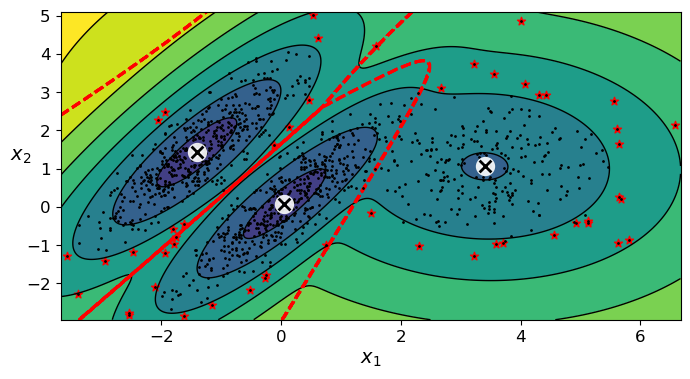

In [130]:
plt.figure(figsize=(8, 4))

plot_gaussian_mixture(gm, X)
plt.scatter(anomalies[:, 0], anomalies[:, 1], color='r', marker='*')
plt.ylim(top=5.1)

plt.show()

클러스터 개수를 정할 땐 BIC나 AIC같은 이론적 정보 기준을 최소화하는 모델을 찾는다. 학습할 파라미터가 많은(클러스터가 많은)모델에게 벌칙을 가하고 데이터에 잘 학습하는 모델에게 보상을 더한다.

In [131]:
gm.bic(X)

8189.733705221636

In [132]:
gm.aic(X)

8102.508425106598

In [133]:
gms_per_k = [GaussianMixture(n_components=k, n_init=10, random_state=42).fit(X)
             for k in range(1, 11)]

In [134]:
bics = [model.bic(X) for model in gms_per_k]
aics = [model.aic(X) for model in gms_per_k]

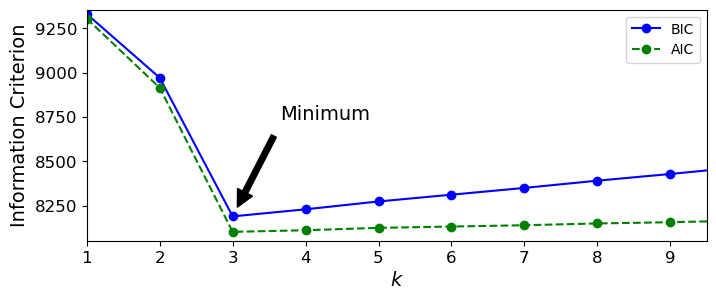

In [135]:
plt.figure(figsize=(8, 3))
plt.plot(range(1, 11), bics, "bo-", label="BIC")
plt.plot(range(1, 11), aics, "go--", label="AIC")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Information Criterion", fontsize=14)
plt.axis([1, 9.5, np.min(aics) - 50, np.max(aics) + 50])
plt.annotate('Minimum',
             xy=(3, bics[2]),
             xytext=(0.35, 0.6),
             textcoords='figure fraction',
             fontsize=14,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.legend()
plt.show()

3에서 두 값이 가장 낮으므로 k=3이 최선의 선택이라 할 수 있다. covariance_type도 바꾸면서 확인해보자.

In [136]:
min_bic = np.infty

for k in range(1, 11):
    for covariance_type in ("full", "tied", "spherical", "diag"):
        bic = GaussianMixture(n_components=k, n_init=10,
                              covariance_type=covariance_type,
                              random_state=42).fit(X).bic(X)
        if bic < min_bic:
            min_bic = bic
            best_k = k
            best_covariance_type = covariance_type

In [137]:
best_k

3

In [138]:
best_covariance_type

'full'

최적의 클러스터 개수를 수동으로 찾지 않고 불필요한 클러스터의 가중치를 0으로 만드는 BayesianGaussianMixture 클래스를 사용할 수 있다. 클러스터 개수 n_components를 최적의 클러스터 개수보다 크다고 믿을 만한 값으로 지정한다. 그러면 알고리즘은 자동으로 불필요한 클러스터를 제거한다.

In [139]:
from sklearn.mixture import BayesianGaussianMixture

In [140]:
bgm = BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)
bgm.fit(X)

BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)

In [141]:
np.round(bgm.weights_, 2)

array([0.4 , 0.21, 0.  , 0.4 , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

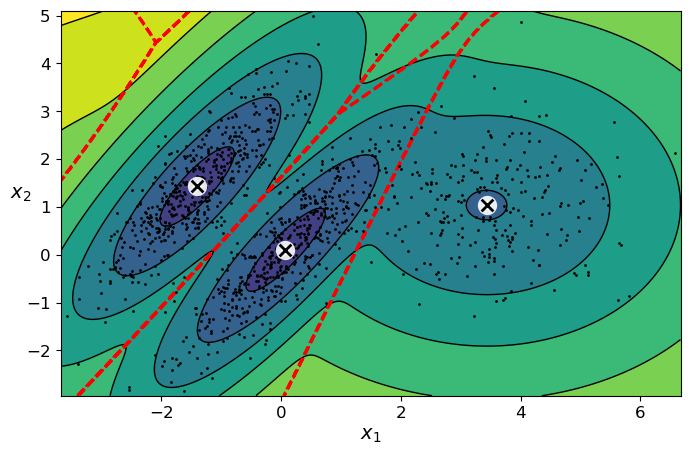

In [142]:
plt.figure(figsize=(8, 5))
plot_gaussian_mixture(bgm, X)
plt.show()

이상치 탐지와 특이치 탐지를 위한 다른 알고리즘은 다음과 같다.

PCA(그리고 inverse_transform() 메서드를 가진 다른 차원 축소 기법): 보통 샘플의 재구성 오차와 이상치의 재구성 오차중 후자가 훨씬 크다. 간단하고 종종 매우 효과적이다.

Fast-MCD: EllipticEnvelope 클래스에서 구현된 알고리즘이다. 정상치가 하나의 가우시안 분포에서 생성되었다 가정한다. 이 가우시안 분포에서 생성되지 않은 이상치로 데이터셋이 오염되었다 가정한다.

아이솔레이션 포레스트: 특히 고차원 데이터셋에서 이상치 감지를 위한 효율적인 알고리즘이다. 무작위로 성장한 결정 트리로 구성된 랜덤 포레스트를 만든다. 각 노드에 특성을 랜덤하게 선택한 다음 랜덤한 임곗값을 골라 데이터셋을 둘로 나눈다. 모든 샘플이 각자 격리될 때까지 진행한다. 이상치는 일반적으로 다른 샘플과 멀기 때문에 적은 단계에서 정상 샘플과 격리된다.

LOF: 주어진 샘플 주위의 밀도와 이웃 주위의 밀도를 비교한다.

one-class SVM: 특이치 탐지에 잘 맞는다. 고차원 데이터셋에서 잘 작동한다. 하지만 SVM의 특징상 대규모 데이터셋으로의 확장은 어렵다.